In [7]:
import pandas as pd
import os

# Specify the input file path
file_path = r'/home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/train_posts_twitter.csv'

# Load the CSV file
df = pd.read_csv(file_path)

# Expand the 'image_id(s)' column to handle multiple IDs separated by commas
df_expanded = df.assign(image_id=df['image_id(s)'].astype(str).str.split(','))
df_expanded = df_expanded.explode('image_id').reset_index(drop=True)

# Drop the original "image_id(s)" column and keep only "image_id"
df_expanded = df_expanded.drop(columns=['image_id(s)'])

# Generate the output file path in the same location
output_file_path = os.path.join(os.path.dirname(file_path), 'Rearranged_Train_Posts_Single_ImageID.csv')

# Save the rearranged dataframe to a CSV file in the same location
df_expanded.to_csv(output_file_path, index=False)

print(f"Rearranged file saved to: {output_file_path}")


Rearranged file saved to: /home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/Rearranged_Train_Posts_Single_ImageID.csv


In [13]:
import pandas as pd
import os

# Paths for the files
rearranged_file_path = r'/home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/Buzzfeed_RF_Enhanced_Classifications_Corrected.csv'
predicted_labels_file_path = r'/home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/image_predicted_label_autoGlu_Bussfeed.csv'

# Load the files
rearranged_df = pd.read_csv(rearranged_file_path)
image_predicted_df = pd.read_csv(predicted_labels_file_path)

# Remove extensions (.jpg, .png, etc.) from the 'image_id' column
if 'image_id' in image_predicted_df.columns:
    image_predicted_df['image_id'] = image_predicted_df['image_id'].str.replace(r'\.(jpg|png|jpeg|bmp|gif)$', '', regex=True)

# Merge the dataframes on 'image_id'
merged_df = pd.merge(rearranged_df, image_predicted_df, on='image_id', how='left')

# Remove rows with any empty (NaN) values
#merged_df = merged_df.dropna()
merged_df.head()
# Save the merged dataframe to a new CSV file in the same directory as the rearranged file
merged_file_path = os.path.join(os.path.dirname(rearranged_file_path), 'Merged_Train_Posts_Image_Predicted_Cleaned_bussfeed.csv')
merged_df.to_csv(merged_file_path, index=False)

print(f"Merged file saved to: {merged_file_path}")


Merged file saved to: /home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/Merged_Train_Posts_Image_Predicted_Cleaned_bussfeed.csv


In [14]:
rearranged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Unnamed: 0                        182 non-null    int64 
 1   image_id                          182 non-null    object
 2   title                             182 non-null    object
 3   text                              182 non-null    object
 4   target                            182 non-null    int64 
 5   keyword_classification            182 non-null    object
 6   general_knowledge_classification  182 non-null    object
 7   LSTM_classification               182 non-null    object
 8   final_classification              182 non-null    object
dtypes: int64(2), object(7)
memory usage: 12.9+ KB


In [15]:
image_predicted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278 entries, 0 to 277
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   image_id               278 non-null    object 
 1   Outlabel               278 non-null    int64  
 2   meanValues             278 non-null    float64
 3   varianceValues         278 non-null    float64
 4   homogeneityValues      278 non-null    float64
 5   contrastValues         278 non-null    float64
 6   dissimilarityValues    278 non-null    int64  
 7   entropyValues          278 non-null    float64
 8   secondMomentValues     278 non-null    float64
 9   correlationValues      278 non-null    float64
 10  energyValues           278 non-null    float64
 11  stdDeviation           278 non-null    float64
 12  skewnessValue          278 non-null    float64
 13  kurtosisValue          278 non-null    float64
 14  histogramValues        278 non-null    int64  
 15  areaVa

In [16]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        182 non-null    int64  
 1   image_id                          182 non-null    object 
 2   title                             182 non-null    object 
 3   text                              182 non-null    object 
 4   target                            182 non-null    int64  
 5   keyword_classification            182 non-null    object 
 6   general_knowledge_classification  182 non-null    object 
 7   LSTM_classification               182 non-null    object 
 8   final_classification              182 non-null    object 
 9   Outlabel                          24 non-null     float64
 10  meanValues                        24 non-null     float64
 11  varianceValues                    24 non-null     float64
 12  homogene

In [8]:
merged_df.head()

,Unnamed: 0,image_id,title,text,target,keyword_classification,general_knowledge_classification,LSTM_classification,final_classification,Outlabel,...,stdDeviation,skewnessValue,kurtosisValue,histogramValues,areaValues,perimeterValues,roughnessValues,averageGrayLevels,overlappingRatios,predicted_label_image
3,3,Real_80-Webpage,Donald Trump retreats to friendly media ground,donald trumps reputation for being always avai...,1,fake,TRUE,TRUE,TRUE,1.0,...,81.870162,0.247820,1.277462,-141.0,8680.0,569.0,1.722850,106.938018,21.421936,1.0
16,16,Real_17-Webpage,Jeb Bush to lecture at Harvard this fall,story highlights bush will deliver his first l...,1,fake,TRUE,TRUE,TRUE,1.0,...,46.242103,2.071674,7.180504,-16593.0,341640.0,5932.0,2.862937,52.542887,7.998206,1.0
35,35,Fake_87-Webpage,BREAKING: Steps to FORCE FBI Director Comey to...,breaking steps to force fbi director comey to ...,0,fake,TRUE,fake,fake,0.0,...,48.012603,2.616436,9.551101,9727.0,299700.0,3585.0,1.847315,43.701141,3.293085,0.0
36,36,Real_48-Webpage,"Clinton: Tulsa shooting 'unbearable,' should b...",cnn hillary clintons campaign manager said wed...,1,fake,TRUE,TRUE,TRUE,1.0,...,88.041412,0.684900,1.686526,16909.0,119140.0,2956.0,2.415854,121.716023,1.832040,1.0
42,42,Fake_75-Webpage,BREAKING: Judge DEMANDS Release Of Clinton’s S...,breaking judge demands release of clinton’s se...,0,fake,TRUE,fake,fake,0.0,...,34.592518,0.462396,2.428533,3201.0,241500.0,11600.0,6.658777,50.288443,1.985194,0.0


Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


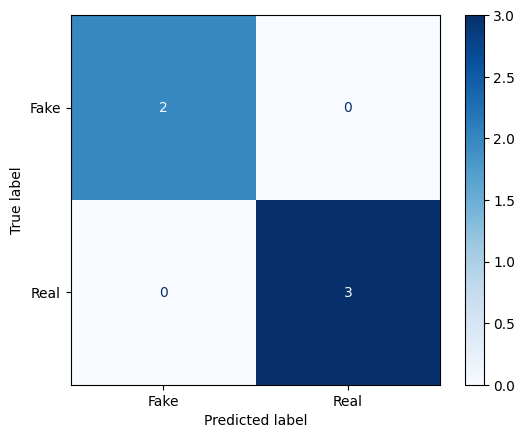

Accuracy for 100 hidden nodes using sigmoid: 1.0000


In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from numpy.linalg import pinv  # Use numpy's pinv as an alternative

# Load the data
filename_path = r'/home/michael/Documenti/Milinda_Githubproject/Weibo and Twitter/twitter/Merged_Train_Posts_Image_Predicted_Cleaned_bussfeed.csv'
data = pd.read_csv(filename_path)

# Replace values in the 'final_prediction' column
data['final_classification'] = data['final_classification'].replace({"fake": 2, "TRUE": 1})

# Extract the relevant columns and preprocess
X = data[['final_classification', 'predicted_label_image']].values
y = data['Outlabel']  # Convert labels to integers

# Scale the input data
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# One-hot encode the target labels
onehotencoder = OneHotEncoder(sparse_output=False)
y_encoded = onehotencoder.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Define network parameters
input_size = X_train.shape[1]
hidden_size = 100

# Initialize input weights and biases
input_weights = np.random.normal(size=[input_size, hidden_size])
biases = np.random.normal(size=[hidden_size])

# Define sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Compute hidden layer nodes using sigmoid activation
def hidden_nodes(X):
    G = np.dot(X, input_weights)
    G = G + biases
    H = sigmoid(G)
    return H

# Calculate output weights using pseudoinverse of hidden nodes
output_weights = np.dot(pinv(hidden_nodes(X_train)), y_train)

# Prediction function
def predict(X):
    out = hidden_nodes(X)
    out = np.dot(out, output_weights)
    return out

# Run predictions on test data
prediction = predict(X_test)

# Compute the confusion matrix and performance metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

C = confusion_matrix(y_test.argmax(axis=1), prediction.argmax(axis=1))
TP = C[0, 0]
FP = C[0, 1]
FN = C[1, 0]
TN = C[1, 1]

accuracy = (TP + TN) / np.sum(C)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * (precision * recall) / (precision + recall)

# Display performance metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=C, display_labels=['Fake', 'Real'])
disp.plot(cmap='Blues')
plt.show()

# Evaluate accuracy
correct = 0
total = X_test.shape[0]
for i in range(total):
    predicted = np.argmax(prediction[i])
    actual = np.argmax(y_test[i])
    correct += 1 if predicted == actual else 0
accuracy = correct / total

print(f'Accuracy for {hidden_size} hidden nodes using sigmoid: {accuracy:.4f}')
